In [27]:
import numpy as np
import matplotlib.pyplot as plt

info_all = np.load('BIC_info.npy', allow_pickle=True)[0]
E_therm_all = np.load('Etherm_biccomponents.npy',allow_pickle=True)[0]
E_therm_one = np.load('Etherm_1component.npy',allow_pickle=True)[0]
E_kin_one = np.load('total_energies.npy',allow_pickle=True)[1]

#for some reason, I can't just plot info_all, something wrong with the type. I had to do it like this
info_plot = []
for row in info_all:
    info_plot.append(list(row))

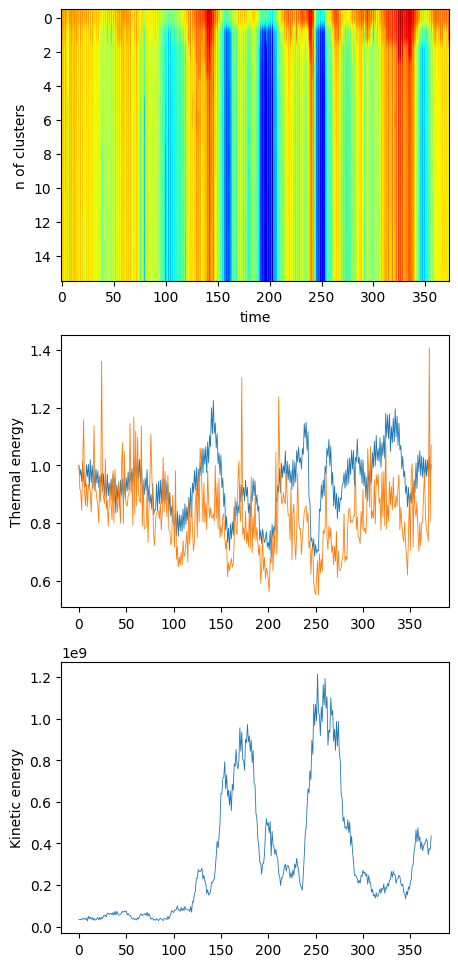

In [30]:
fig,ax = plt.subplots(3,1,figsize=(5,12))

cf=ax[0].imshow(np.transpose(info_plot), origin = 'upper', cmap='jet', aspect='auto')
ax[0].set_xlabel('time')
ax[0].set_ylabel('n of clusters')

ax[1].plot(E_therm_one/E_therm_one[0],label='one gaussian',lw=0.6)
ax[1].plot(E_therm_all/E_therm_all[0],label='best fitting number of components',lw=0.6)
ax[1].set_ylabel('Thermal energy')

ax[2].plot(E_kin_one,lw=0.6)
ax[2].set_ylabel('Kinetic energy')


plt.show()